There is a lot more that you can do with outputs (such as including interactive outputs)
with your book. For more information about this, see [the Jupyter Book documentation](https://jupyterbook.org)

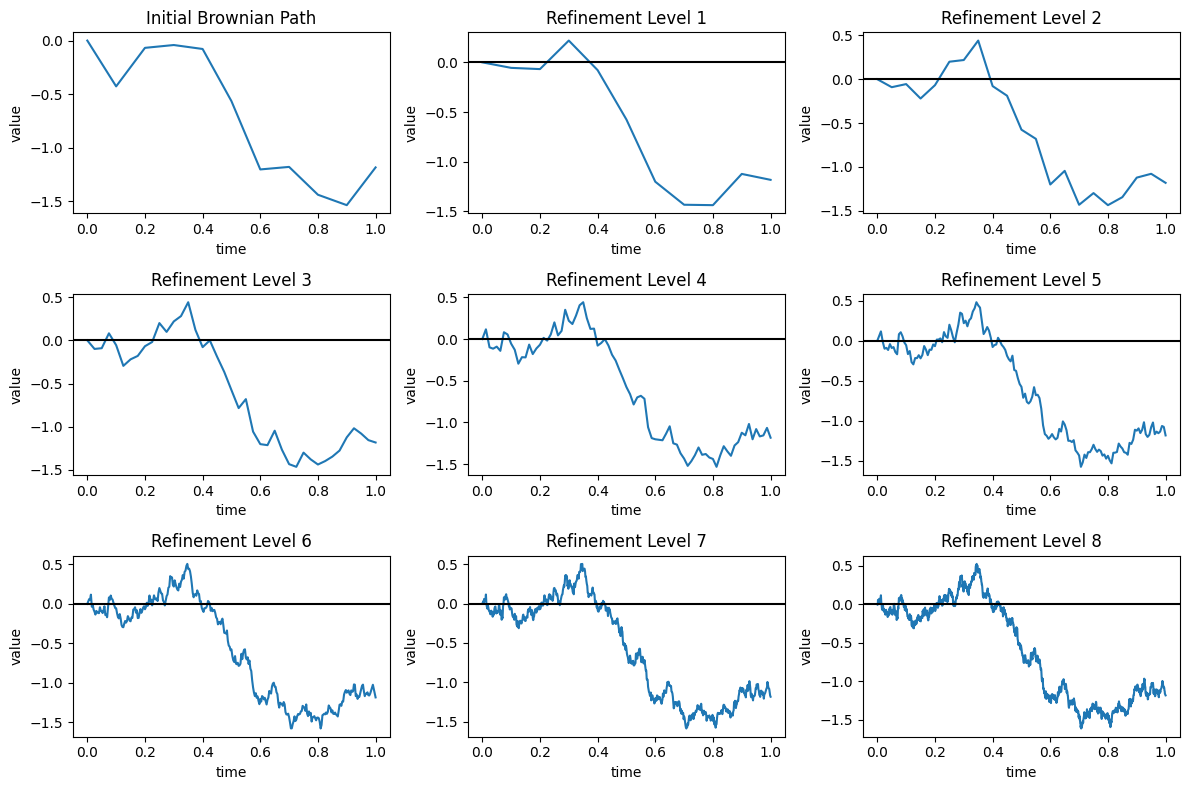

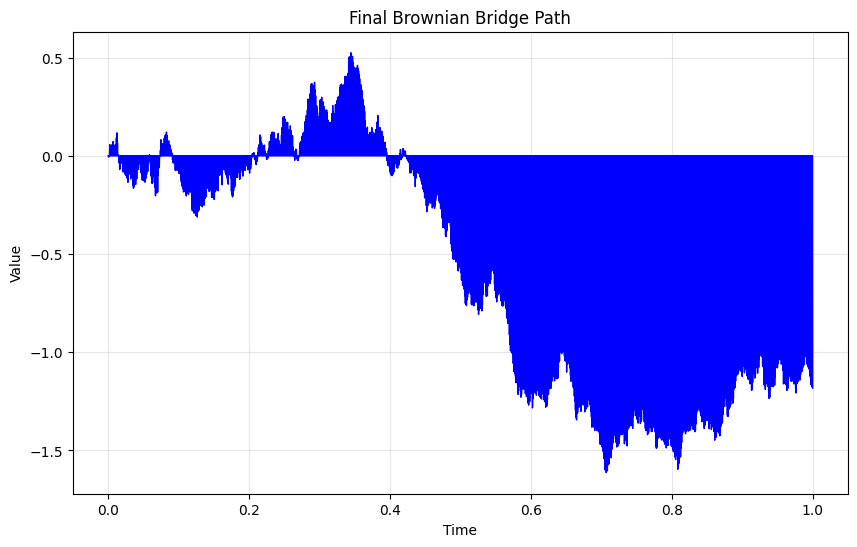

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.04496771  0.02717559 -0.01818329 ...  0.02536814  0.00138266
  -0.00747013]
 [ 0.06376755  0.0442787  -0.04660963 ...  0.03058889  0.03661894
   0.05306049]
 ...
 [-0.20600465 -0.11560936 -0.78600674 ...  0.89982255  0.45991158
   0.93403319]
 [-0.19594547 -0.06380876 -0.83188208 ...  0.90575006  0.46893141
   0.92433479]
 [-0.21400616 -0.05951471 -0.81937128 ...  0.94425163  0.4212451
   0.86249313]]
[[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-9.76562500e-05 -9.76562500e-05 -9.76562500e-05 ... -9.76562500e-05
  -9.76562500e-05 -9.76562500e-05]
 [-1.95312500e-04 -1.95312500e-04 -1.95312500e-04 ... -1.95312500e-04
  -1.95312500e-04 -1.95312500e-04]
 ...
 [-1.24804688e-01 -1.24804688e-01 -1.24804688e-01 ... -1.24804688e-01
  -1.24804688e-01 -1.24804688e-01]
 [-1.24902344e-01 -1.24902344e-01 -1.24902344e-01 ... -1.24902344e-01
  -1.24902344e-01 -1.2

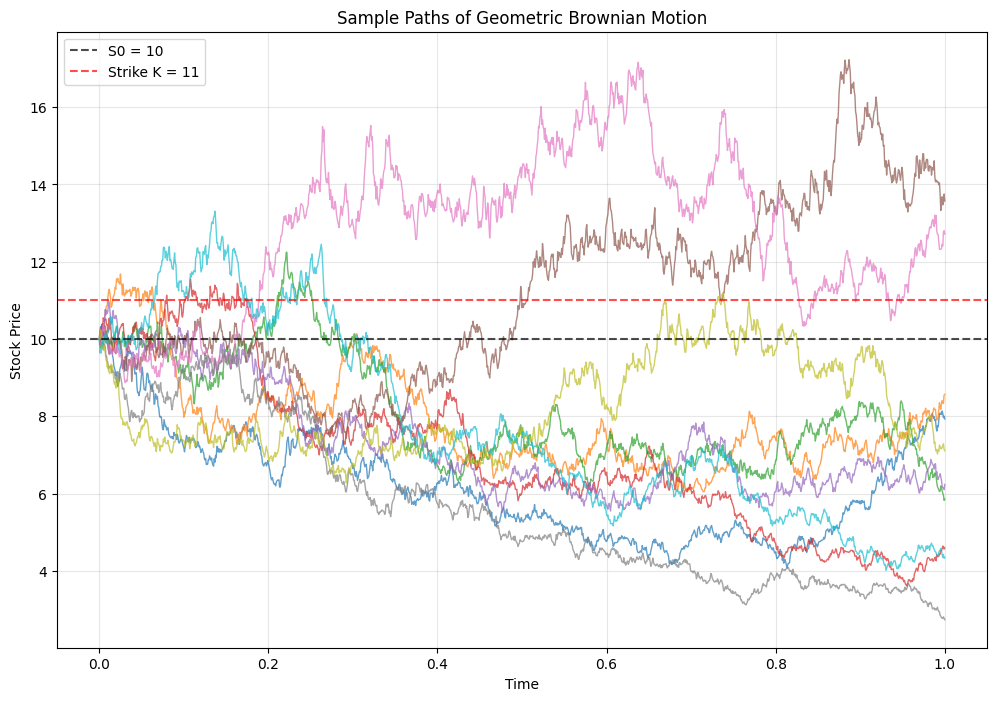

Estimated option price: 0.0196


In [1]:
import numpy as np
import matplotlib.pyplot as plt
# (A)
# Path simulation via Brownian bridge, path refinement
# Parameters: T=final time, L=number of refinements,
# N0=number of grid points on the first level.

T = 1
L = 8
N0 = 10
N = N0 * (2**L)
EMX = np.zeros((L+1, N+1))
x0 = 0
h = T/N

# Path of Brownian motion at crudest level
B = np.concatenate([[0], np.sqrt(T/N0) * np.cumsum(np.random.randn(N0))])
# Generates 1d BM w time step size = sqrt(T/N0)

# Store initial path at coarse grid points
EMX[0, ::2**L] = B
# Places values of B into EMX[0] spaced apart by 2^L (to match full path length N+1)

# Create time vector for initial path
t = np.linspace(0, T, N0+1) # coarsest level time partition

# Plot initial path
plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 1)
plt.plot(t, B)
plt.xlabel('time')
plt.ylabel('value')
plt.title('Initial Brownian Path')

# The Brownian bridge simulations
for i in range(1, L+1):
    # Refinement of paths via Brownian bridge
    p = 2**(L-i+1)
    EMX[i, :] = EMX[i-1, :] # start from previous ref.level paths
    h = T/(N0 * 2**(i-1)) # time step in this ref.level
    length = N//p//2 # Number of midpoints to fill in by BB
    
    # Generate random increments for bridge
    random_increments = np.random.randn(length)
    
    # Apply Brownian bridge formula
    for j in range(length):
        """ Use BB formula to interpolate the midpoint value
        B_mid = (B_left + B_right)/ 2 + sqrt(h/2)*Z
        """
        idx_left = j*2*p
        idx_mid = j*2*p + p  
        idx_right = j*2*p + 2*p
        
        if idx_right <= N:
            EMX[i, idx_mid] = (0.5 * (EMX[i, idx_left] + EMX[i, idx_right]) + 
                              np.sqrt(h/2) * random_increments[j])
    
    # Plot refined path
    # Find non-zero points for plotting
    non_zero_mask = np.any(EMX[:i+1, :] != 0, axis=0) | (np.arange(N+1) == 0)
    plot_indices = np.where(non_zero_mask)[0]
    # Places values of B into EMX[0] spaced apart by 2^L (to match full path length N+1)
    
    plt.subplot(3, 3, i+1)
    if len(plot_indices) > 0:
        t_plot = plot_indices * T / N
        plt.plot(t_plot, EMX[i, plot_indices])
    plt.axhline(0, color='black')
    plt.xlabel('time')
    plt.ylabel('value')
    plt.title(f'Refinement Level {i}')

plt.tight_layout()
plt.show()

# Final refined level paths
final_path = EMX[L, :]
final_time = np.linspace(0, T, len(final_path))

plt.figure(figsize=(10, 6))
plt.plot(final_time, final_path, 'b-', linewidth=1)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Final Brownian Bridge Path')
plt.grid(True, alpha=0.3)
plt.show()


# (B)
"""
M samples of GBM at T=1 are generated. The value E[(K-S_1)_+] is approximated.
"""
# On grid [0,1] with t_j -t_{j-1} = 1/10 * 2^7.
# c > 0, s.t. E[St] = S0.
# For this value c, approx M=10**5 many sample paths of S, and plot 10 of them.
# Fix K = 11 and approx E[max{K - S1, 0}] by sample mean of the M samples.
M = 10**5
J = 10*(2**7)
T = 1
S0 = 10
sigma = 0.5

dt = T / J
time_grid = np.linspace(0, T, J+1)

# E[St] = S0*exp(ct + 0.5*(sigma**2)*t) -> set c = -0.5*sigma**2
c = -0.5*sigma**2
K = 11

B = np.vstack([np.zeros((1, M)), np.sqrt(T/J)*np.cumsum(np.random.randn(J,M), axis=0)])
print(B)

drift = c * np.outer(time_grid, np.ones(M))
drift = c * np.tile(time_grid.reshape(-1, 1), (1, M))
print(drift)

# Log price - the exponent
X = drift + sigma * B
print(X)
# Stock price
S = S0 * np.exp(X)
print(S)


# Plot first 10 sample paths
plt.figure(figsize=(12, 8))
plt.plot(time_grid, S[:, :10], alpha=0.7, linewidth=1)

plt.axhline(y=S0, color='black', linestyle='--', alpha=0.7, label=f'S0 = {S0}')
plt.axhline(y=K, color='red', linestyle='--', alpha=0.7, label=f'Strike K = {K}')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Sample Paths of Geometric Brownian Motion')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Calculate option payoff: max(K - S_T, 0) for put option
S_T = S[:, -1]  # Terminal stock price at T=1
payoff = np.maximum(K - S_T, 0)  # Put option payoff

# Calculate estimated option price
option_price = np.mean(payoff)
print(f"Estimated option price: {option_price:.4f}")